In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
import kagglehub
path = kagglehub.dataset_download("joniarroba/noshowappointments")
df = pd.read_csv(path + "/KaggleV2-May-2016.csv")
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df['ScheduledDay_DayOfWeek'] = df['ScheduledDay'].dt.dayofweek
df['ScheduledDay_Hour'] = df['ScheduledDay'].dt.hour

df['AppointmentDay_DayOfWeek'] = df['AppointmentDay'].dt.dayofweek
df['AppointmentDay_Month'] = df['AppointmentDay'].dt.month

df['TimeGap'] =( df['AppointmentDay'] - df['ScheduledDay']).dt.total_seconds()

# df.drop(columns=['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],inplace=True)
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_DayOfWeek,ScheduledDay_Hour,AppointmentDay_DayOfWeek,AppointmentDay_Month,TimeGap
39838,5.113286e+13,5685734,F,2016-05-11 11:02:42+00:00,2016-05-13 00:00:00+00:00,12,JESUS DE NAZARETH,0,0,0,0,0,0,No,2,11,4,5,133038.0
85854,5.653484e+12,5762984,F,2016-06-02 08:26:11+00:00,2016-06-02 00:00:00+00:00,52,JARDIM CAMBURI,0,1,0,0,0,0,No,3,8,3,6,-30371.0
79095,3.942666e+14,5608124,F,2016-04-20 13:17:56+00:00,2016-05-31 00:00:00+00:00,39,TABUAZEIRO,0,0,0,0,0,1,No,2,13,1,5,3494524.0
84360,7.358187e+11,5706924,M,2016-05-17 08:58:27+00:00,2016-06-02 00:00:00+00:00,32,PRAIA DO SUÁ,0,0,0,1,0,1,No,1,8,3,6,1350093.0
13689,8.939448e+13,5554999,F,2016-04-07 09:21:20+00:00,2016-05-04 00:00:00+00:00,5,MONTE BELO,0,0,0,0,0,1,No,3,9,2,5,2299120.0


In [5]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder,StandardScaler

le = LabelEncoder()
oe = OrdinalEncoder()
scaler = StandardScaler()
df['No-show'] = le.fit_transform(df["No-show"])
df['Gender'] = oe.fit_transform(df[["Gender"]])
df['Neighbourhood'] = oe.fit_transform(df[["Neighbourhood"]])
df['Age'] = scaler.fit_transform(df[['Age']])
df['TimeGap'] = scaler.fit_transform(df[['TimeGap']])

df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_DayOfWeek,ScheduledDay_Hour,AppointmentDay_DayOfWeek,AppointmentDay_Month,TimeGap
0,2.987250e+13,5642903,0.0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,1.077932,39.0,0,1,0,0,0,0,0,4,18,4,4,-0.688190
1,5.589978e+14,5642503,1.0,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0.818306,39.0,0,0,0,0,0,0,0,4,16,4,4,-0.681371
2,4.262962e+12,5642549,0.0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,1.077932,45.0,0,0,0,0,0,0,0,4,16,4,4,-0.681854
3,8.679512e+11,5642828,0.0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,-1.258708,54.0,0,0,0,0,0,0,0,4,17,4,4,-0.685064
4,8.841186e+12,5642494,0.0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0.818306,39.0,0,1,1,0,0,0,0,4,16,4,4,-0.681322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0.0,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,0.818306,43.0,0,0,0,0,0,1,0,1,9,1,6,1.633422
110523,3.596266e+12,5650093,0.0,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,0.601950,43.0,0,0,0,0,0,1,0,1,7,1,6,1.638344
110524,1.557663e+13,5630692,0.0,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,-0.696184,43.0,0,0,0,0,0,1,0,2,16,1,6,2.008420
110525,9.213493e+13,5630323,0.0,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,0.039425,43.0,0,0,0,0,0,1,0,2,15,1,6,2.010902


In [6]:
df.drop(columns=['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],inplace=True)
df

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_DayOfWeek,ScheduledDay_Hour,AppointmentDay_DayOfWeek,AppointmentDay_Month,TimeGap
0,0.0,1.077932,39.0,0,1,0,0,0,0,0,4,18,4,4,-0.688190
1,1.0,0.818306,39.0,0,0,0,0,0,0,0,4,16,4,4,-0.681371
2,0.0,1.077932,45.0,0,0,0,0,0,0,0,4,16,4,4,-0.681854
3,0.0,-1.258708,54.0,0,0,0,0,0,0,0,4,17,4,4,-0.685064
4,0.0,0.818306,39.0,0,1,1,0,0,0,0,4,16,4,4,-0.681322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0.0,0.818306,43.0,0,0,0,0,0,1,0,1,9,1,6,1.633422
110523,0.0,0.601950,43.0,0,0,0,0,0,1,0,1,7,1,6,1.638344
110524,0.0,-0.696184,43.0,0,0,0,0,0,1,0,2,16,1,6,2.008420
110525,0.0,0.039425,43.0,0,0,0,0,0,1,0,2,15,1,6,2.010902


In [7]:
X = df.drop(columns=['No-show']).values
y = df['No-show'].values

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [9]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)

In [10]:
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, auc, precision_recall_curve

# Model

##Numpy version

In [23]:
np.random.seed(2)

class Layers:
    def __init__(self,n_inputs,n_neurons):
        self.weights=None
        self.biases=np.zeros((1,n_neurons))
        self.weights = np.random.randn(n_inputs,n_neurons)*0.01
    def forward(self,inputs):
        self.inputs=inputs
        self.output=np.dot(inputs,self.weights)+self.biases
    def backward(self,dvalues):
        self.dweights=np.dot(self.inputs.T,dvalues)
        self.dbiases=np.sum(dvalues,axis=0,keepdims=True)
        self.dinputs=np.dot(dvalues,self.weights.T)

class RELU:
    def forward(self,inputs):
        self.inputs=inputs
        self.output=np.maximum(0,inputs)

    def backward(self,dvalues):
        self.dinputs=dvalues.copy()
        self.dinputs[self.inputs<=0]=0

class SoftMax:
    def forward(self,inputs):
        self.inputs=inputs
        exp_values=np.exp(inputs-np.max(inputs,axis=1,keepdims=True))
        self.output=exp_values / np.sum(exp_values,axis=1,keepdims=True)

    def backward(self,dvalues):
        self.dinputs=np.empty_like(dvalues)

class loss_function():
    def __init__(self, class_weights=None):
        self.class_weights = class_weights

    def calculate(self,output,y):
        sample_losses=self.forward(output,y)
        data_loss=np.mean(sample_losses)
        return data_loss

    def forward(self,y_pred,y_true):
        y_pred_clipped=np.clip(y_pred,1e-7,1-1e-7)
        samples=len(y_pred)

        if len(y_true.shape)==1:
            correct_confidences=y_pred_clipped[range(samples),y_true]
            y_true_one_hot_temp = np.zeros((samples, y_pred.shape[1]))
            y_true_one_hot_temp[range(samples), y_true] = 1

        elif len(y_true.shape)==2:
            correct_confidences=np.sum(y_pred_clipped*y_true,axis=1)
            y_true_one_hot_temp = y_true

        log_likelihoods=-np.log(correct_confidences)
        weighted_log_likelihoods = log_likelihoods * np.sum(self.class_weights * y_true_one_hot_temp, axis=1)
        return weighted_log_likelihoods

    def backward(self,dvalues,y_true):
        samples = len(dvalues)
        if len(y_true.shape)==1:
            y_true_one_hot=np.zeros((samples,len(dvalues[0])))
            y_true_one_hot[range(samples),y_true] = 1
        elif len(y_true.shape)==2:
            y_true_one_hot=y_true

        self.dinputs=(dvalues-y_true_one_hot)/samples

class NN_using_no_framework():
    def __init__(self,layers,activation_functions,
                 loss_class=loss_function,learningrate=0.01,class_weights=None):
        self.layers=layers
        self.activation_functions=activation_functions
        self.loss_function=loss_class(class_weights=class_weights)
        self.learning_rate=learningrate
        self.current_batch=None

    def forward_propagation(self,X):
        current = X
        self.layer_outputs = []
        self.activation_outputs = []


        for k in range(len(self.layers)):
            self.layers[k].forward(current)
            self.layer_outputs.append(self.layers[k].output)

            self.activation_functions[k].forward(self.layers[k].output)
            self.activation_outputs.append(self.activation_functions[k].output)

            current = self.activation_functions[k].output

        return current

    def backward_propagation(self,output,y_true):
        self.loss_function.backward(output,y_true)
        gradients=self.loss_function.dinputs
        for i in reversed(range(len(self.layers))):
            if not isinstance(self.activation_functions[i], SoftMax):
                self.activation_functions[i].inputs = self.layer_outputs[i]
                self.activation_functions[i].backward(gradients)
                gradients=self.activation_functions[i].dinputs
            self.layers[i].inputs = self.activation_outputs[i-1] if i > 0 else self.current_batch
            self.layers[i].backward(gradients)
            gradients=self.layers[i].dinputs

    def train(self,X,y,epochs=1000,batch_size=64):
        self.epoch_losses=[]
        for epoch in range(epochs):
            epoch_loss=0
            num_batches=0
            for i in range(0,len(X),batch_size):
                X_batch = X[i : i + batch_size]
                y_batch = y[i : i + batch_size]

                self.current_batch = X_batch
                output=self.forward_propagation(X_batch)
                batch_loss = self.loss_function.calculate(output, y_batch)
                epoch_loss += batch_loss
                num_batches += 1
                self.backward_propagation(output,y_batch)

                for layer in self.layers:
                    layer.weights -=self.learning_rate*layer.dweights
                    layer.biases -=self.learning_rate*layer.dbiases

            avg_epoch_loss = epoch_loss / num_batches
            self.epoch_losses.append(avg_epoch_loss)

            if (epoch) % 100 == 0:
                print(f'Epoch: {epoch}, Average Epoch Loss: {avg_epoch_loss:.6f}')


In [24]:
neurons=[len(X_train[0]),32,16,8,2]
layers=[]
activation_functions=[]
for i in range(len(neurons)-1):
    layer_temp=Layers(neurons[i],neurons[i+1])
    layers.append(layer_temp)
    if i<len(neurons)-2:
        activation_temp=RELU()
        activation_functions.append(activation_temp)
    else:
        activation_temp=SoftMax()
        activation_functions.append(activation_temp)

model=NN_using_no_framework(layers,activation_functions,class_weights=class_weights)

start=time.time()
model.train(X_train,y_train,epochs=800)
numpy_training_time = time.time() - start


print("Training Data")
start=time.time()
predictions_train=np.argmax(model.forward_propagation(X_train),axis=1)
numpy_predicting_time=time.time()-start
print(f"Time Taken by Numpy Implementation:\nTraining={numpy_training_time}\nPredicting={numpy_predicting_time}")

threshold=0.25
print("Validation Data")
y_pred=model.forward_propagation(X_test)
predictions_val = (y_pred[:, 1] >= threshold).astype(int)

print("True values: ", y_test[0:10])
print("Predicted values: ", predictions_val[0:10])

accuracy_test = np.mean(predictions_val == y_test)
print(f"Validation Accuracy: {accuracy_test:.4f}")

f1_scratch = f1_score(y_test, predictions_val, pos_label=1)
print(f"\nF1-Score: {f1_scratch:.4f}")

precision=precision_score(y_test, predictions_val, pos_label=1)
recall=recall_score(y_test, predictions_val, pos_label=1)
print(f"\nPrecision: {precision:.4f}")
print(f"\nRecall: {recall:.4f}")

precision, recall, _ = precision_recall_curve(y_test, y_pred[:, 1])
pr_auc_scratch = auc(recall, precision)
print(f"\nPR_AUC: {pr_auc_scratch:.4f}")

cm_scratch = confusion_matrix(y_test, predictions_val)
print("\nConfusion Matrix:\n", cm_scratch)

Epoch: 0, Average Epoch Loss: 0.841778
Epoch: 100, Average Epoch Loss: 0.910964
Epoch: 200, Average Epoch Loss: 0.910905
Epoch: 300, Average Epoch Loss: 0.809255
Epoch: 400, Average Epoch Loss: 0.793873
Epoch: 500, Average Epoch Loss: 0.788596
Epoch: 600, Average Epoch Loss: 0.785612
Epoch: 700, Average Epoch Loss: 0.783476
Training Data
Time Taken by Numpy Implementation:
Training=362.25862193107605
Predicting=0.07207632064819336
Validation Data
True values:  [1 1 0 0 0 1 0 0 1 1]
Predicted values:  [0 1 0 0 0 0 0 0 1 1]
Validation Accuracy: 0.6582

F1-Score: 0.4351

Precision: 0.3247

Recall: 0.6593

PR_AUC: 0.3539

Confusion Matrix:
 [[17458  9079]
 [ 2256  4366]]


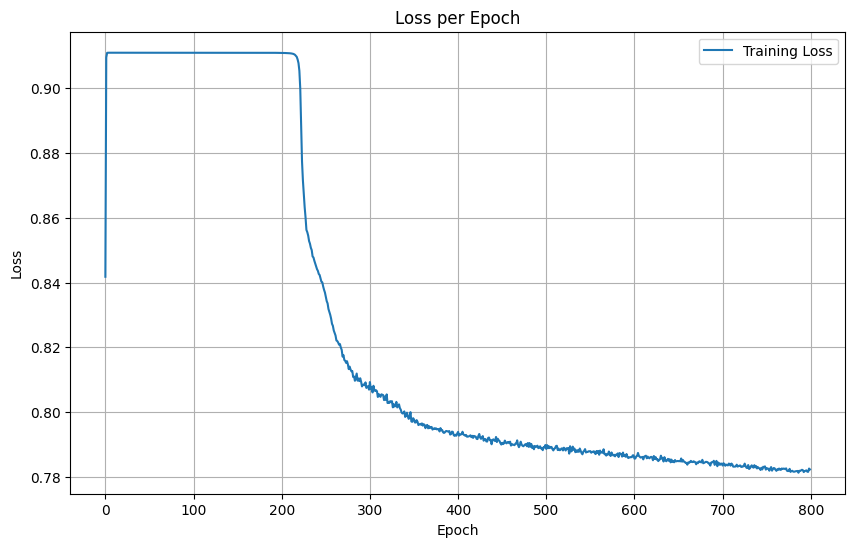

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(model.epoch_losses[0:], label='Training Loss')

plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Pytorch version

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [12]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32
learning_rate = 0.001
epochs = 100

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
class NN_using_pytorch(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
model_py = NN_using_pytorch(input_size)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model_py.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    model_py.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model_py(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Print training loss every few epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.3684
Epoch [20/100], Loss: 0.3319
Epoch [30/100], Loss: 0.5689
Epoch [40/100], Loss: 0.3641
Epoch [50/100], Loss: 0.5832
Epoch [60/100], Loss: 0.8173
Epoch [70/100], Loss: 0.4459


In [ ]:
from torchmetrics.classification import BinaryPrecision, BinaryRecall, BinaryF1Score


precision_metric = BinaryPrecision()
recall_metric = BinaryRecall()
f1_metric = BinaryF1Score()

model_py.eval()
with torch.no_grad():
    all_outputs = []
    all_labels = []
    for inputs, labels in test_loader:
        outputs = model_py(inputs)
        all_outputs.append(outputs)
        all_labels.append(labels)

    all_outputs = torch.cat(all_outputs)
    all_labels = torch.cat(all_labels)

    predicted_labels = (all_outputs > 0.5).int()

    precision = precision_metric(predicted_labels, all_labels.int())
    recall = recall_metric(predicted_labels, all_labels.int())
    f1 = f1_metric(predicted_labels, all_labels.int())

    print(f'Precision on test set: {precision:.4f}')
    print(f'Recall on test set: {recall:.4f}')
    print(f'F1 Score on test set: {f1:.4f}')